In [ ]:
file=pd.read_csv('height-weight.csv')
file

In [ ]:
plt.scatter(file['Weight'],file['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

INDEPENDENT AND DEPENDENT FEATURES

In [ ]:
x=file[['Weight']] #Independent feature must be in 2d array or a dataframe
y=file['Height'] #Dependent feature can be 1d array or Series
print(type(x),type(y))
print(x.shape,y.shape)

Correlation of features

for simple linear regression the correlation of indep. and dep. feature is done

and if it is highly positive it means as the indep. features values increases dep features values also increase

and vice versa

In [ ]:
file.corr()

Seaborn Visualisation

In [ ]:
import seaborn as sns
sns.pairplot(file)

Generating test and train data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
y_train

In [ ]:
y_test

STANDORDIZATION

we do standordization so that if multiple features are there in input then the one with larger numerical values doesn't get biased benifits from the model

Standard Scaler
X=(xi−μ)/s

fit() it finds the  mean and std. deviation of the feature
transform() is used to transform the feature values acc to the fit

for training a data we use fit_transform
in testing as training and test data was earlier the part of real data combined for the particular feature we need to keep the mean ,std dev same for the test data as of training one

so here we only use transform()

And in this we prevent DATA LEAKAGE()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
x_train=scaler.fit_transform(x_train)
x_train

In [ ]:
x_test=scaler.transform(x_test)
x_test

Apply Linear Regression Model


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regression=LinearRegression(n_jobs=-1)  #n_jobs=-1 will use all the available processors on the system

In [ ]:
regression.fit(x_train,y_train) #here it will create the best fit line in case of simple linear regression and hyperplane in case of multiple linear regression

In [ ]:
print("Coffecient or slope ",regression.coef_)
print("Intercept ",regression.intercept_)

Plotting the Best Fit line

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train),color='red')

Predicting the output of training data

predicted_output=intercept+ coeff(or slope) * (weights i.e. test data)

=> y_pred_test=156.470 + 17.29(X_test)

In [ ]:
y_pred=regression.predict(x_test)
y_pred

Performance metrics

MAE/MSE/RMSE to measure prediction error

R Square or Adj R Sq tells how well the model explains the data (explanatory power)
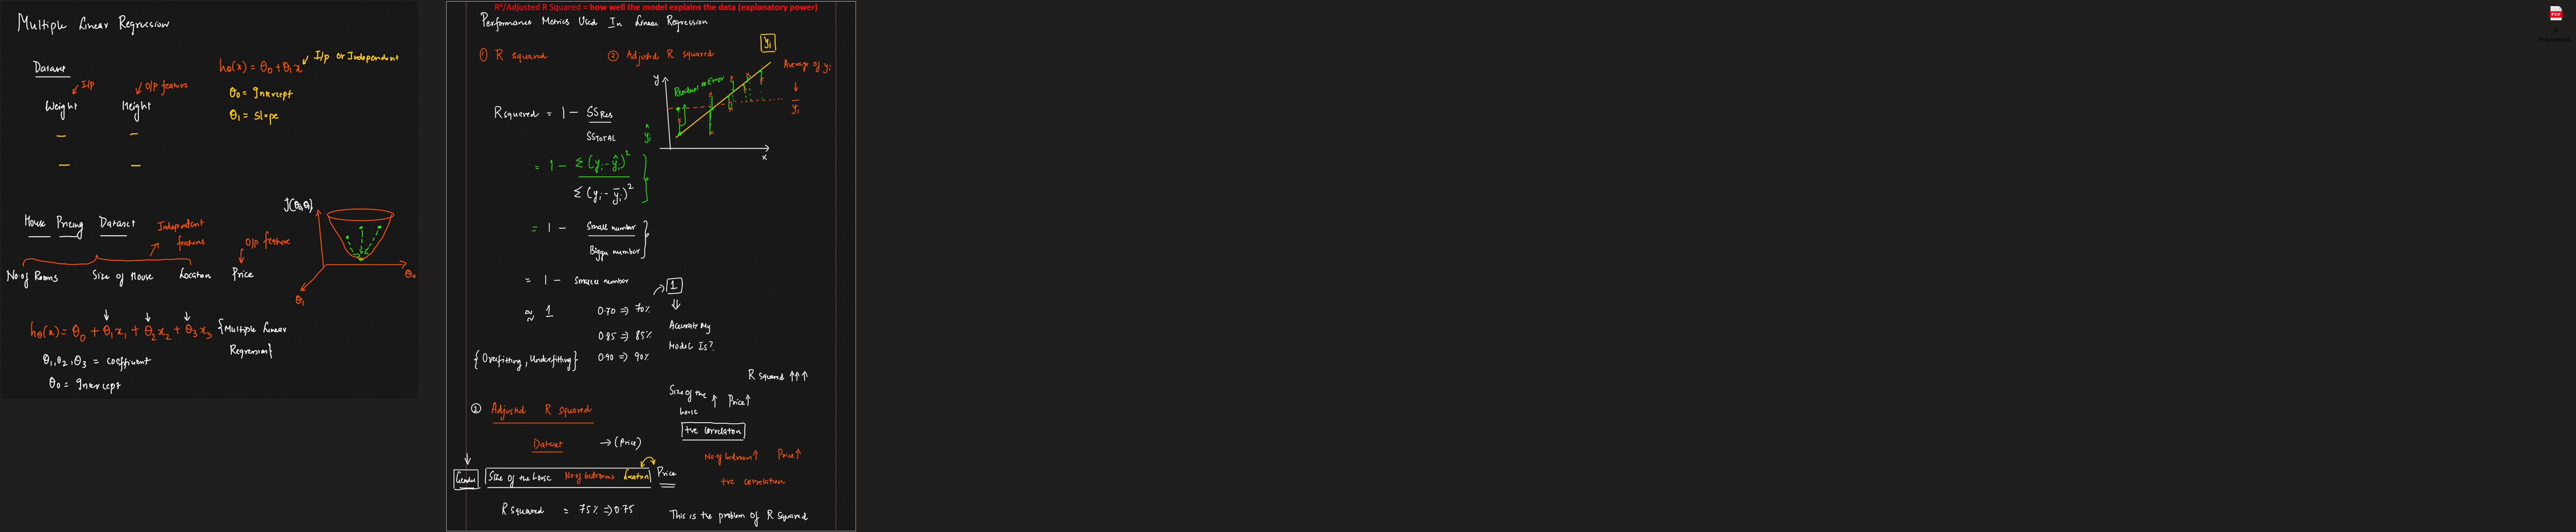

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='red')

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


# R square

Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
score_r2=r2_score(y_test,y_pred)
score_r2

Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [ ]:
#display adjusted R-squared
1 - (1-score_r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

In [ ]:
#OLS linear regression
import statsmodels.api as sm

In [ ]:
model=sm.OLS(y_train,x_train).fit()

In [ ]:
pred_y=model.predict(x_test)
pred_y

In [ ]:
model.summary()

Prediction for the new data

see this gives 1401 too much variation from the other predicted and the data values
coz we did not transformed this value

In [ ]:
regression.predict([[72]])

In [ ]:
regression.predict(scaler.transform([[72]]))

In [ ]:
model.predict([[72]])

In [ ]:
model.predict(scaler.transform([[72]]))